## Time spend in lstat() system call when walking ana file system

Purging xtc,hdf5 files was run wit hstrace:

    strace -T -tt -e lstat -O <output-file> -f ......
    and the output contains one line for each file
    10:34:47.721263 lstat("/reg/data/ana12/mec/mecls8417/xtc/e1269-r0008-s00-c00.xtc", {st_mode=S_IFREG|0440, st_size=395284, ...}) = 0 <0.001000>    

The time spend in the lstat() call is the last field (e.g.: 0.001000 secs).

In [45]:
import os
import sys
import re
import math
import numpy as np
import matplotlib.pyplot as plt

def strace_call_time(fn, match):
    latency = []
    with open(fn) as fp:
        for line in fp:
            m = match.match(line.rstrip())
            if m:
                latency.append(float(m[1]))
    return latency

average:  19.67ms std:  17.67ms  nenetries:   1951 fn: lstat_ana03.20200207
average:   1.15ms std:   2.67ms  nenetries:  65191 fn: lstat_ana12.20200207
average:   0.96ms std:   0.15ms  nenetries:  64967 fn: lstat_ana12.20200207T105800


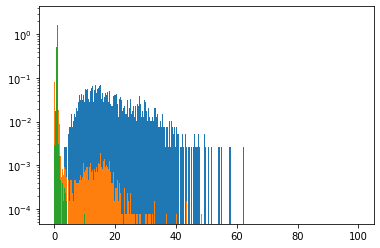

In [81]:
match = re.compile(".* lstat\(.* <([0-9].*)>$")
data_dir = os.path.expanduser("~psdatmgr/logs/fm/purge_xtc")
for entry in os.listdir(data_dir):
    pfn = os.path.join(data_dir, entry)
    if os.path.isfile(pfn):
        lat_ms = np.array(strace_call_time(pfn,match)) * 1000
        print(f"average: {np.average(lat_ms):-6.2f}ms std: {np.std(lat_ms):-6.2f}ms  nenetries: {len(lat_ms):6d} fn: {entry}")
        plt.hist(lat_ms, bins=500, range=(0,100), log=True, density=True)
        